In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

# Project Outline: Clustering Real Estate Data

## Problem Description

**Title:** Clustering Real Estate Data

**Introduction:** The real estate market is complex and diverse, with varying factors influencing property values and neighborhood characteristics. By clustering real estate data, we can uncover patterns and group similar properties based on their features, which can assist in market analysis, investment decisions, and urban planning.

**Objective:** To identify distinct groups of properties based on various features, helping to understand market trends, identify high-value areas, and make data-driven decisions.

**Data Source:** https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset


Here's a brief overview of each feature and its potential relevance for clustering:

- **CRIM**: Crime rate per capita, useful for understanding neighborhood safety.
- **ZN**: Proportion of residential land zoned for large lots, indicating neighborhood development.
- **INDUS**: Proportion of non-retail business acres, reflecting commercial activity.
- **CHAS**: Proximity to the Charles River, which might affect property values.
- **NOX**: Nitric oxides concentration, an air quality measure.
- **RM**: Average number of rooms per dwelling, indicating housing size.
- **AGE**: Proportion of older buildings, which might affect neighborhood character.
- **DIS**: Distance to Boston employment centers, impacting accessibility.
- **RAD**: Accessibility to radial highways, affecting transport convenience.
- **TAX**: Property tax rate, influencing housing affordability.
- **PTRATIO**: Pupil-teacher ratio, reflecting local education quality.
- **B**: Proportion of Black residents, potentially reflecting community diversity.
- **LSTAT**: Percentage of lower-status population, indicating socioeconomic status.
- **MEDV**: Median value of homes, which can be used for evaluating the clustering results.


## Exploratory Data Analysis

In [7]:
data = pd.read_csv('/kaggle/input/real-estate-dataset/data.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0


In [11]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


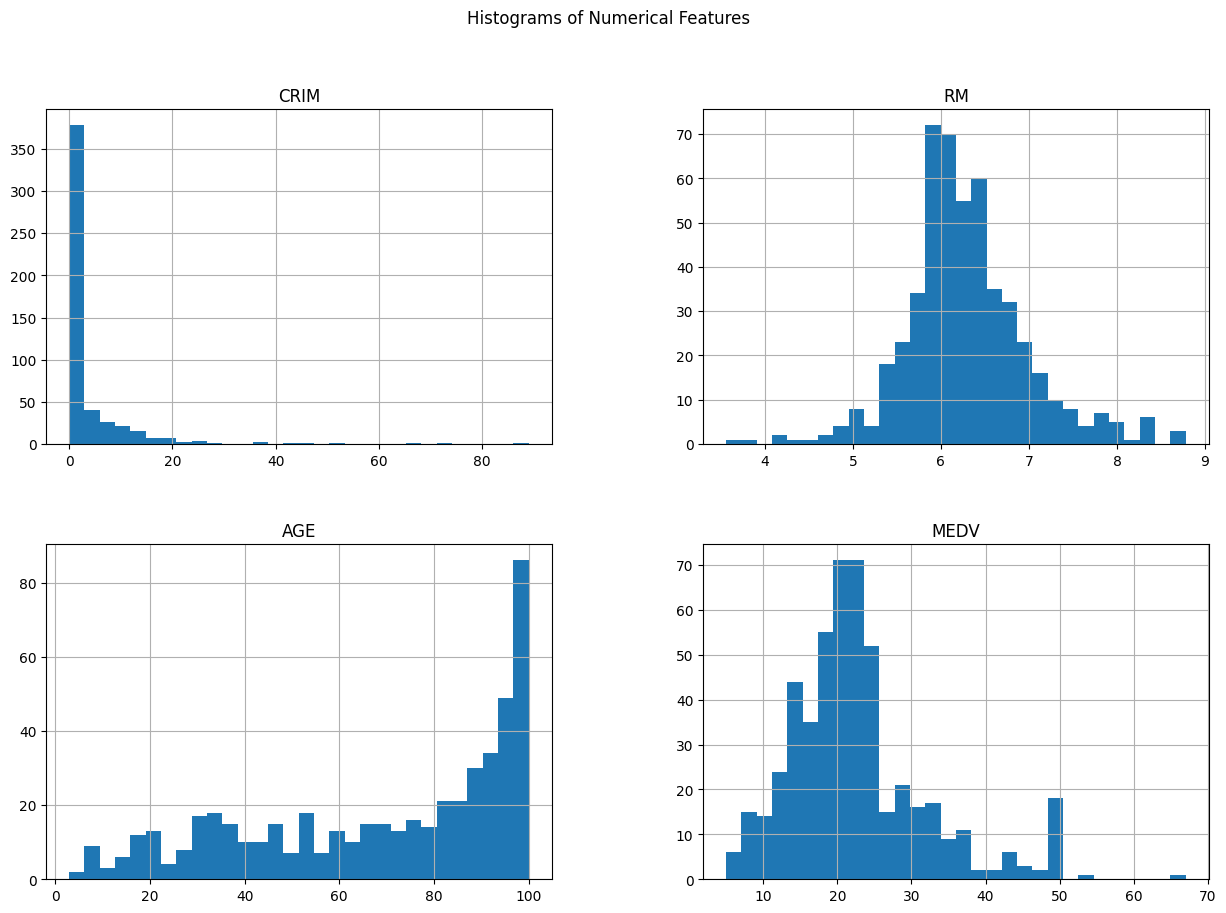

In [12]:
features = ['CRIM', 'RM', 'AGE', 'MEDV']
data[features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

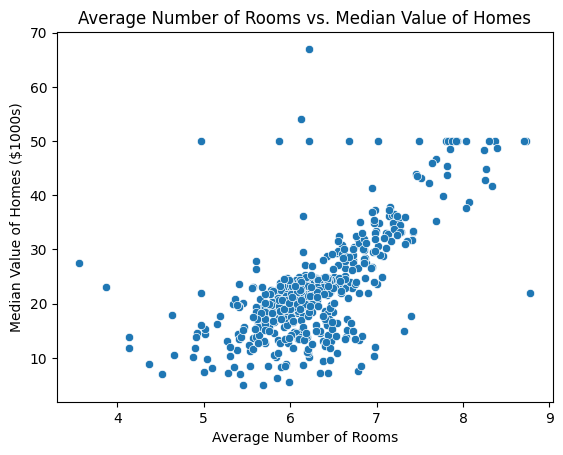

In [14]:
sns.scatterplot(x='RM', y='MEDV', data=data)
plt.title('Average Number of Rooms vs. Median Value of Homes')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Value of Homes ($1000s)')
plt.show()

### Correlation Matrix

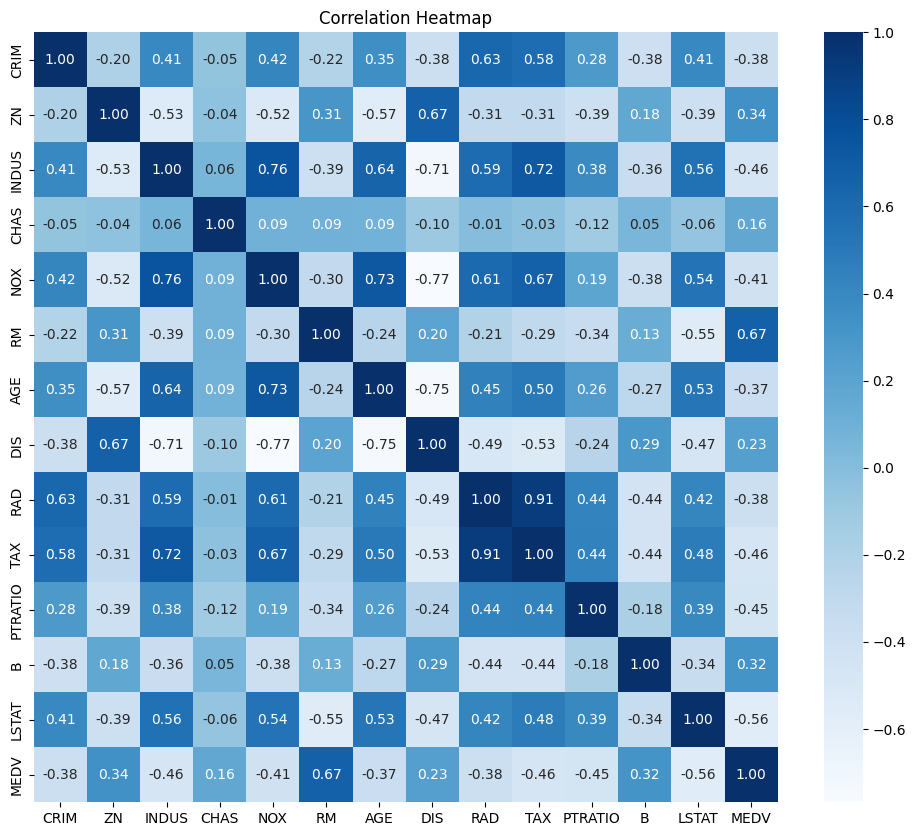

In [21]:
corr = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
corr_matrix = data.corr()
abs_corr_matrix = corr_matrix.abs()
stacked_corr = abs_corr_matrix.stack()
stacked_corr = stacked_corr[stacked_corr < 1]
top_corrs = stacked_corr.nlargest(10)

In [24]:
for (feature_pair, corr_value) in top_corrs.items():
    feature1, feature2 = feature_pair
    print(f'Features: {feature1} and {feature2}, Correlation: {corr_value:.2f}')

Features: RAD and TAX, Correlation: 0.91
Features: TAX and RAD, Correlation: 0.91
Features: NOX and DIS, Correlation: 0.77
Features: DIS and NOX, Correlation: 0.77
Features: INDUS and NOX, Correlation: 0.76
Features: NOX and INDUS, Correlation: 0.76
Features: AGE and DIS, Correlation: 0.75
Features: DIS and AGE, Correlation: 0.75
Features: NOX and AGE, Correlation: 0.73
Features: AGE and NOX, Correlation: 0.73


### Multicollinearity

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

features = ['RAD', 'TAX', 'NOX', 'DIS', 'INDUS', 'AGE']  # List features with high correlations
X = data[features]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

  feature        VIF
0     RAD  12.941810
1     TAX  55.526900
2     NOX  42.643817
3     DIS   5.892705
4   INDUS  12.910781
5     AGE  17.396324


## Model

In [33]:
selected_features = ['RAD', 'DIS', 'AGE', 'TAX']
features_subset = data[selected_features]

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features_subset = scaler.fit_transform(features_subset)

In [54]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(scaled_features_subset)
data['Cluster'] = clusters

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pairwise Plot of Selected Features with Clustering

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

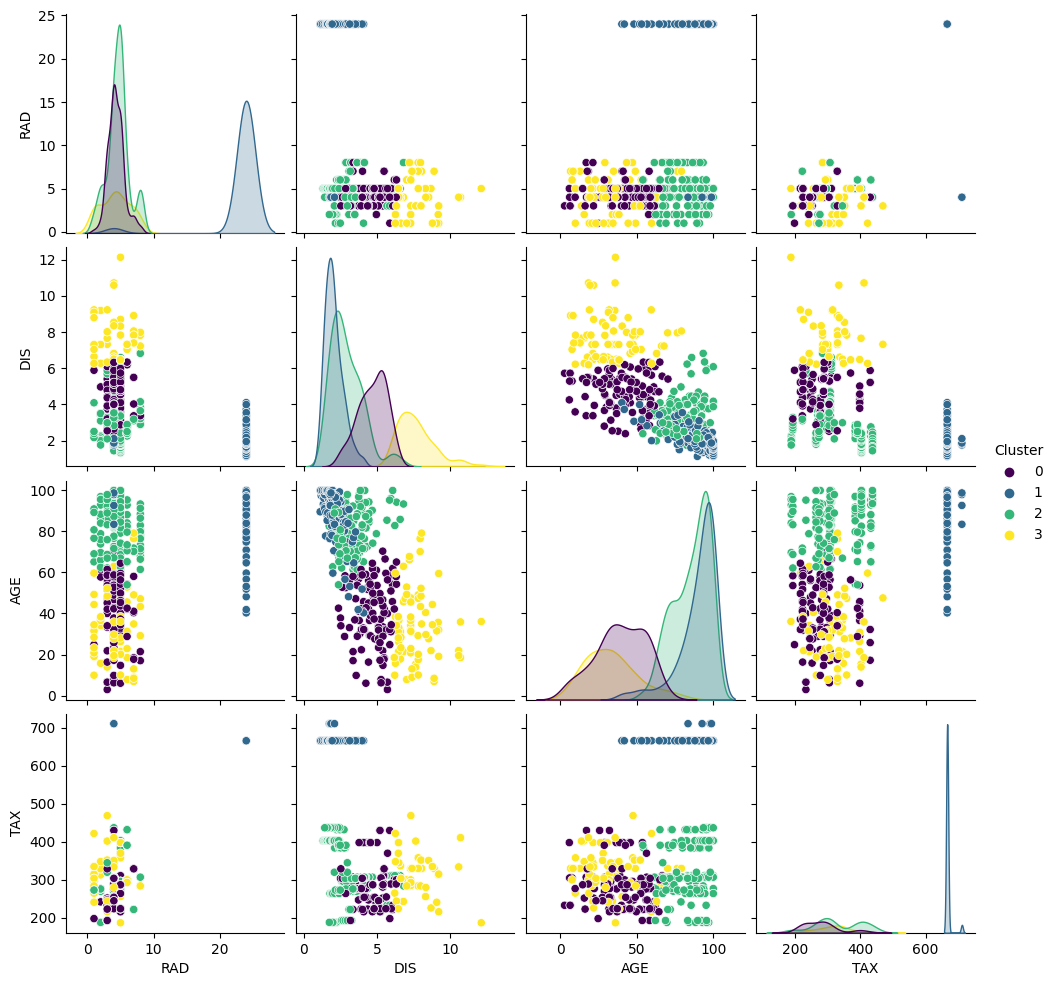

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[['RAD', 'DIS', 'AGE', 'TAX', 'Cluster']], hue='Cluster', palette='viridis', diag_kind='kde')
plt.show()

In [57]:
import pandas as pd

cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=['RAD', 'DIS', 'AGE', 'TAX'])
print(cluster_centers_df)

        RAD       DIS       AGE       TAX
0 -0.598473  0.432444 -1.042206 -0.756339
1  1.588112 -0.824871  0.760613  1.551230
2 -0.560813 -0.407471  0.603575 -0.459749
3 -0.607043  1.851062 -1.252974 -0.539092


In [58]:
cluster_summary = data.groupby('Cluster').agg({
    'RAD': ['mean', 'std', 'min', 'max'],
    'DIS': ['mean', 'std', 'min', 'max'],
    'AGE': ['mean', 'std', 'min', 'max'],
    'TAX': ['mean', 'std', 'min', 'max']
})
print(cluster_summary)

               RAD                         DIS                             \
              mean       std min max      mean       std     min      max   
Cluster                                                                     
0         4.290598  1.196690   1   8  4.690527  0.958789  2.3817   6.3361   
1        23.270073  3.764196   4  24  2.054470  0.607900  1.1296   4.0983   
2         4.617486  1.615896   1   8  2.929582  1.103492  1.3216   6.8185   
3         4.216216  2.191330   1   8  7.664770  1.247668  6.1899  12.1265   

               AGE                                 TAX                       
              mean        std   min    max        mean        std  min  max  
Cluster                                                                      
0        39.359829  16.054686   2.9   70.4  280.572650  55.837405  193  430  
1        89.967883  12.469840  40.3  100.0  667.642336   8.469441  666  711  
2        85.559563  11.506864  54.0  100.0  330.322404  71.916312  188

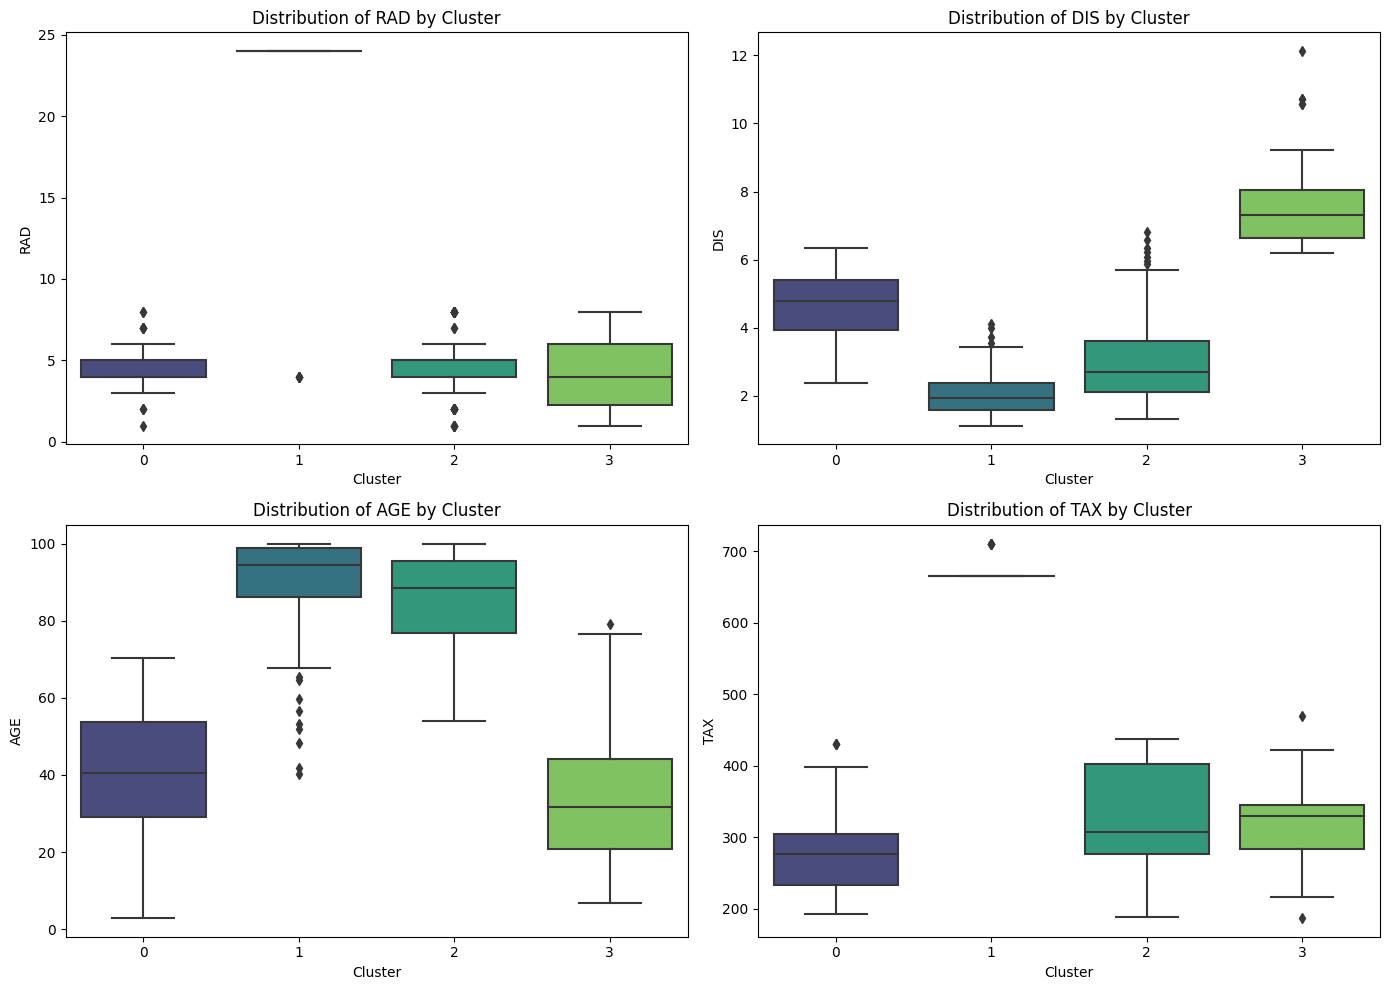

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
features = ['RAD', 'DIS', 'AGE', 'TAX']
plt.figure(figsize=(14, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Cluster', y=feature, data=data, palette='viridis')
    plt.title(f'Distribution of {feature} by Cluster')

plt.tight_layout()
plt.show()

## Discussion

Based on the summary statistics provided for each cluster, we can interpret the characteristics of each cluster in terms of the RAD, DIS, AGE, and TAX features. Here’s a detailed analysis:

**Cluster 0:**

RAD (Accessibility to Radial Highways): Mean = 4.29, Std = 1.20, Range = 1 to 8
Interpretation: This cluster has moderate accessibility to radial highways.
DIS (Distance to Employment Centers): Mean = 4.69, Std = 0.96, Range = 2.38 to 6.34
Interpretation: This cluster is characterized by moderate distances to employment centers.
AGE (Proportion of Old Buildings): Mean = 39.36, Std = 16.05, Range = 2.9 to 70.4
Interpretation: This cluster includes areas with a moderate proportion of older buildings.
TAX (Property Tax Rate): Mean = 280.57, Std = 55.84, Range = 193 to 430
Interpretation: The property tax rates are moderate to high in this cluster.
Summary: Cluster 0 represents neighborhoods with moderate accessibility to highways, moderate distances to employment centers, and a mix of older buildings. The property taxes are also moderate.

**Cluster 1:**

RAD (Accessibility to Radial Highways): Mean = 23.27, Std = 3.76, Range = 4 to 24
Interpretation: This cluster has very high accessibility to radial highways.
DIS (Distance to Employment Centers): Mean = 2.05, Std = 0.61, Range = 1.13 to 4.10
Interpretation: This cluster is characterized by short distances to employment centers.
AGE (Proportion of Old Buildings): Mean = 89.97, Std = 12.47, Range = 40.3 to 100.0
Interpretation: This cluster features neighborhoods with a high proportion of older buildings.
TAX (Property Tax Rate): Mean = 667.64, Std = 8.47, Range = 666 to 711
Interpretation: The property tax rates are very high in this cluster.
Summary: Cluster 1 represents areas with very high accessibility to highways, very short distances to employment centers, and a high proportion of older buildings. These areas also have very high property taxes.

**Cluster 2:**

RAD (Accessibility to Radial Highways): Mean = 4.62, Std = 1.62, Range = 1 to 8
Interpretation: This cluster has moderate accessibility to radial highways, similar to Cluster 0.
DIS (Distance to Employment Centers): Mean = 2.93, Std = 1.10, Range = 1.32 to 6.82
Interpretation: This cluster has relatively short to moderate distances to employment centers.
AGE (Proportion of Old Buildings): Mean = 85.56, Std = 11.51, Range = 54.0 to 100.0
Interpretation: This cluster also features neighborhoods with a high proportion of older buildings.
TAX (Property Tax Rate): Mean = 330.32, Std = 71.92, Range = 188 to 437
Interpretation: The property tax rates in this cluster are moderate to high.
Summary: Cluster 2 is similar to Cluster 0 in terms of highway accessibility but features a higher proportion of older buildings and moderate to high property taxes.

**Cluster 3:**

RAD (Accessibility to Radial Highways): Mean = 4.22, Std = 2.19, Range = 1 to 8
Interpretation: This cluster has moderate accessibility to radial highways, similar to Clusters 0 and 2.
DIS (Distance to Employment Centers): Mean = 7.66, Std = 1.25, Range = 6.19 to 12.13
Interpretation: This cluster is characterized by greater distances to employment centers compared to other clusters.
AGE (Proportion of Old Buildings): Mean = 33.44, Std = 16.90, Range = 6.8 to 79.2
Interpretation: This cluster features neighborhoods with a lower proportion of older buildings compared to other clusters.
TAX (Property Tax Rate): Mean = 317.01, Std = 53.99, Range = 187 to 469
Interpretation: The property tax rates are moderate to high in this cluster.
Summary: Cluster 3 represents neighborhoods with moderate highway accessibility and greater distances to employment centers. These areas have a lower proportion of older buildings and moderate to high property taxes.

## Conclusion

Based on the detailed analysis of the summary statistics for each cluster, we can draw several conclusions about the characteristics of neighborhoods in each cluster with respect to the RAD, DIS, AGE, and TAX features. This analysis helps us fulfill the project's objective: to identify distinct groups of properties, understand market trends, identify high-value areas, and make data-driven decisions.

**Cluster 0:**

Cluster 0 neighborhoods exhibit balanced access to highways and employment centers, a mix of building ages, and moderate property taxes. These areas represent stable, moderately accessible regions with a variety of property ages and a balanced tax burden.

**Cluster 1:**

Cluster 1 neighborhoods are highly accessible with very short distances to employment centers, feature a high proportion of older buildings, and have very high property taxes. These areas are likely high-value regions due to their excellent accessibility and proximity to employment centers, despite the higher tax rates.

**Cluster 2:**

Cluster 2 neighborhoods, while similar to Cluster 0 in highway accessibility, feature a higher proportion of older buildings and moderate to high property taxes. These areas may represent established neighborhoods with potentially stable property values due to the presence of older buildings and reasonable access to employment centers.

**Cluster 3:**

Cluster 3 neighborhoods have moderate highway accessibility but are located farther from employment centers. They have a lower proportion of older buildings and moderate to high property taxes. These areas could be seen as emerging markets, with potential for development due to the lower proportion of older buildings and the moderate tax rates.

This clustering analysis has identified four distinct groups of properties, each with unique characteristics. By understanding these clusters, stakeholders can better grasp market trends, identify high-value areas (like those in Cluster 1), and make data-driven decisions tailored to the specific needs of each cluster. For instance, urban planners and developers can prioritize investments in clusters with high growth potential, while policymakers can address the specific challenges of each cluster to foster balanced development across all regions.